## Question Industry vs Date Joined
Are there certain industries that have seen an increase in Unicorns joining over specific periods?


In [2]:
# Import Dependenciews
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pathlib import Path

In [3]:
# Load and read CSV file
csvPath = Path("Project-1-CSVs/merged_df.csv")
mergedDF = pd.read_csv(csvPath, encoding="UTF-8")

# Drop original CSV indexing
mergedDF = mergedDF.drop(columns=['Unnamed: 0'])

# Display
mergedDF.head(10)

,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$140,$225,225.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,$137,150.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,$66,66.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,$50,65.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,$40,25.4,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,Checkout.com,$40,$11,11.0,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST..."
6,Instacart,$39,$12,NaN,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
7,Databricks,$38,$31,43.0,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates..."
8,Revolut,$33,$33,33.0,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital"
9,Epic Games,$31.50,$31.50,22.5,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"


In [4]:
# Reformat date Joined
mergedDF['Date Joined'] = pd.to_datetime(mergedDF['Date Joined'], format = '%m/%d/%Y')

# Create a sorted DataFrame
sortedMergedDF = pd.DataFrame(mergedDF)

# Sort companies from earliest join date to most recent join date
sortedMergedDF = sortedMergedDF.sort_values(by="Date Joined", ascending = True)

# Display top 10 (earliest joined)
sortedMergedDF.head(10)


,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors
725,Veepee,$1.38,$1.38,1.38,2007-07-02,France,La Plaine Saint-Denis,E-commerce & direct-to-consumer,"Summit Partners, Qatar Holding"
125,Vice Media,$5.70,NaN,NaN,2011-04-02,United States,Brooklyn,Internet software & services,"Technology Crossover Ventures, A&E Television ..."
105,Klarna,$6.70,$6.70,6.70,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
447,Trendy Group International,$2,$2,2.00,2012-02-13,Hong Kong,Kowloon,Consumer & retail,L Capital Partners
11,Fanatics,$27,$31,31.00,2012-06-06,United States,Jacksonville,E-commerce & direct-to-consumer,"SoftBank Group, Andreessen Horowitz, Temasek H..."
1,SpaceX,$127,$137,150.00,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
448,Avant,$2,$2,2.00,2012-12-17,United States,Chicago,Artificial intelligence,"RRE Ventures, Tiger Global, August Capital"
615,Mu Sigma,$1.50,$1.50,1.50,2013-02-07,United States,Northbrook,Data management & analytics,"Sequoia Capital, General Atlantic"
93,Automattic,$7.50,$7.50,7.50,2013-05-27,United States,San Francisco,Internet software & services,"Insight Venture Partners, Lowercase Capital, P..."
930,Lookout,$1,$1,1.00,2013-10-10,United States,San Francisco,Cybersecurity,"Accel Partners, Greylock Partners, Lowercase C..."


In [5]:
# Isolate the year from date
sortedMergedDF['Year Joined'] = sortedMergedDF['Date Joined'].dt.year

# Populate list of different unique industry types
uniqueIndustries = sortedMergedDF['Industry'].unique()
uniqueIndustries

array(['E-commerce & direct-to-consumer', 'Internet software & services',
       'Fintech', 'Consumer & retail', 'Other', 'Artificial intelligence',
       'Data management & analytics', 'Cybersecurity',
       'Mobile & telecommunications', 'Health', 'Hardware',
       'Auto & transportation', 'Supply chain, logistics, & delivery',
       'Travel', 'Edtech',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Kuang-Chi',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Jungle Ventures, Accel, Venture Highway',
       'Dragonfly Captial, Qiming Venture Partners, DST Global',
       'SingTel Innov8, Alpha JWC Ventures, Golden Gate Ventures',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Artificial Intelligence',
       'Mundi Ventures, Doqling Capital Partners, Activant Capital',
       'Vertex Ventures SE Asia, Global Founders Capital, Visa Ven

In [6]:
# Find out how many companies are categorized into each industry to simplify 

# Convert all industry names to lowercase so that AI isn't two separate categories
sortedMergedDF['Industry'] = sortedMergedDF['Industry'].str.lower()

# To make its more legible, correctly capitalize it
sortedMergedDF['Industry'] = sortedMergedDF['Industry'].str.title()

industryCounts = sortedMergedDF['Industry'].value_counts()

industryCounts

Industry
Fintech                                                               245
Internet Software & Services                                          227
E-Commerce & Direct-To-Consumer                                       106
Health                                                                 94
Artificial Intelligence                                                85
Supply Chain, Logistics, & Delivery                                    68
Other                                                                  65
Cybersecurity                                                          58
Data Management & Analytics                                            45
Auto & Transportation                                                  43
Mobile & Telecommunications                                            40
Hardware                                                               38
Edtech                                                                 32
Consumer & Retail            

In [7]:
print(sortedMergedDF.columns)

Index(['Company', '2022_Valuation', '2023_Valuation', '2024_Valuation',
       'Date Joined', 'Country', 'City', 'Industry', 'Select Investors',
       'Year Joined'],
      dtype='object')


In [8]:
# Filter industries with counts greater than the threshold
filteredIndustries = industryCounts[industryCounts > 1].index

# Filter the original DataFrame
filteredDF = sortedMergedDF[sortedMergedDF['Industry'].isin(filteredIndustries)]
filteredDF

,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors,Year Joined
725,Veepee,$1.38,$1.38,1.38,2007-07-02,France,La Plaine Saint-Denis,E-Commerce & Direct-To-Consumer,"Summit Partners, Qatar Holding",2007
125,Vice Media,$5.70,NaN,NaN,2011-04-02,United States,Brooklyn,Internet Software & Services,"Technology Crossover Ventures, A&E Television ...",2011
105,Klarna,$6.70,$6.70,6.70,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
447,Trendy Group International,$2,$2,2.00,2012-02-13,Hong Kong,Kowloon,Consumer & Retail,L Capital Partners,2012
11,Fanatics,$27,$31,31.00,2012-06-06,United States,Jacksonville,E-Commerce & Direct-To-Consumer,"SoftBank Group, Andreessen Horowitz, Temasek H...",2012
...,...,...,...,...,...,...,...,...,...,...
617,Orna Therapeutics,$1.50,$1.50,1.50,2022-08-16,United States,Cambridge,Health,"MPM Capital, Astellas Venture Management, F2 V...",2022
537,MEGAZONE,$1.83,$1.83,1.83,2022-08-16,South Korea,Seoul,Internet,"Salesforce Ventures, ATP Investment, kt invest...",2022
744,Shiprocket,$1.30,$1.30,1.23,2022-08-16,India,New Delhi,Internet,"Bertelsmann India Investments, March Capital P...",2022
573,Incredible Health,$1.65,$1.65,1.65,2022-08-17,United States,San Francisco,Internet Software & Services,"Obvious Ventures, Andreessen Horowitz, NFX",2022


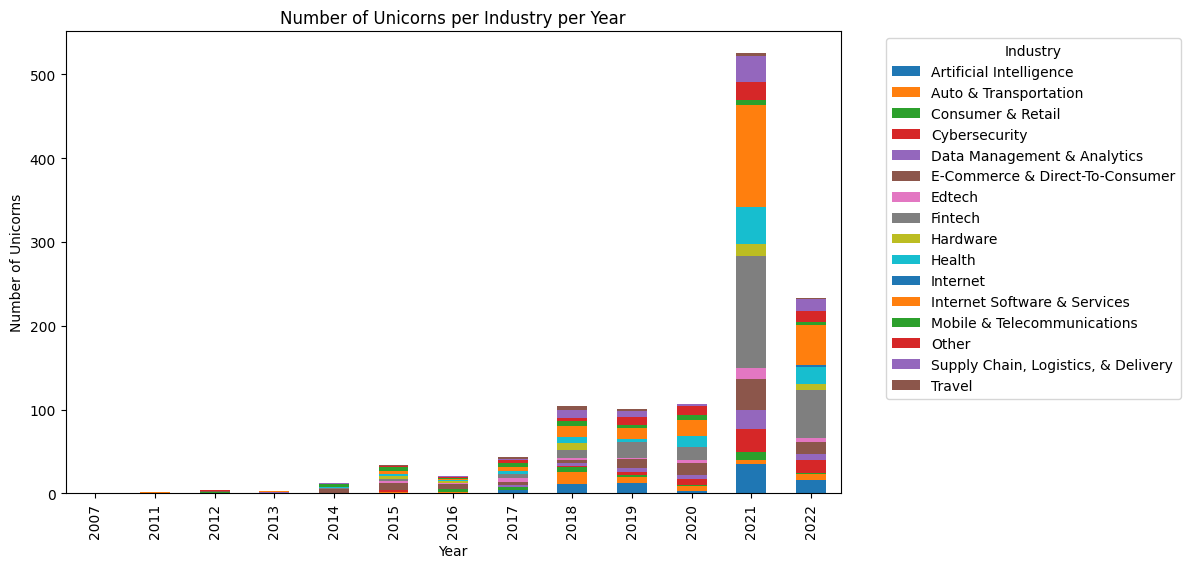

In [9]:
# Create Dataframe so it'll be organized to create data visualizations
filteredDF = pd.DataFrame(filteredDF)

# Count number of unicorns per industry per year
companiesPerIndustry = filteredDF.groupby(['Year Joined', 'Industry']).size().unstack(fill_value=0)

# Stacked Bar Chart
companiesPerIndustry.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Unicorns per Industry per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save plot to file
plt.savefig("images/IndustryvsDateJoined/Number of Unicorn Companies Joining Per Industry Per Year",
           bbox_inches='tight', dpi=300)
plt.show()